In [1]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import myscripts
import random
import pandas as pd

In [2]:
random.seed(100)

Sequentielle de taille 1

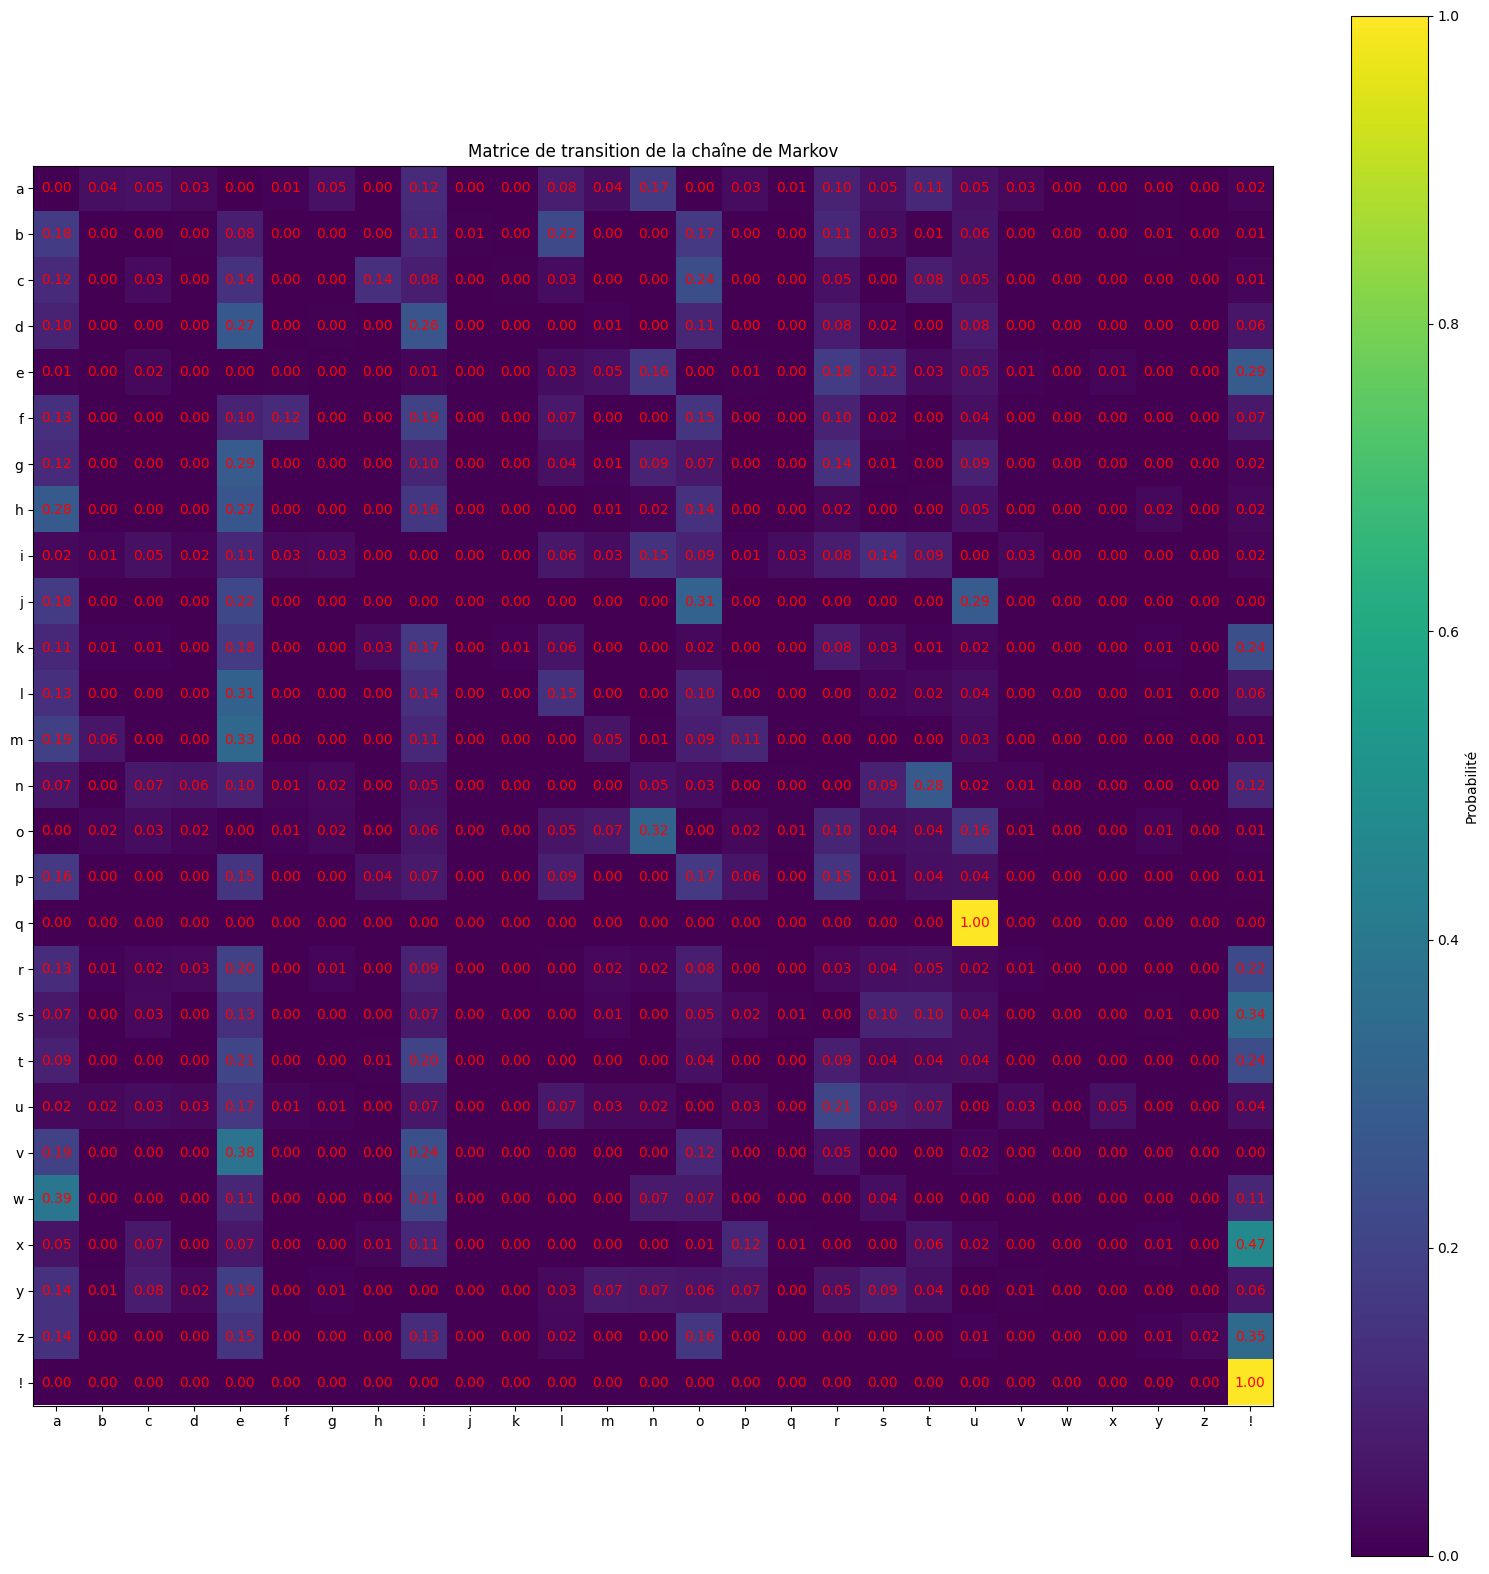

In [3]:
alphabet = myscripts.dico_alphabet()

A, PI = myscripts.apprentissage_markov([mot.replace("\n", "")+"!" for mot in open("dictionnaire.txt", "r").readlines()])

fig, ax = plt.subplots(figsize=(20, 20))
im = ax.imshow(A, cmap="viridis")
ax.set_xticks(np.arange(len(alphabet)), labels=alphabet.keys())
ax.set_yticks(np.arange(len(alphabet)), labels=alphabet.keys())

ax.set_title("Matrice de transition de la chaîne de Markov")

cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Probabilité")


for i in range(len(alphabet)):
    for j in range(len(alphabet)):
        ax.text(j, i, f"{A[i, j]:.2f}",
                       ha="center", va="center", color="red", fontsize=10)


plt.show()
plt.close()

In [ ]:
vprenom1 = myscripts.logvraisemblance_markov("arthur!", A, PI)
vprenom2 = myscripts.logvraisemblance_markov("louise!", A, PI)
vmotfr1 = myscripts.logvraisemblance_markov("abusif!", A, PI)
vmotfr2 = myscripts.logvraisemblance_markov("bouche!", A, PI)
vmotall = myscripts.logvraisemblance_markov("abfuhr!", A, PI)
aleamot = "".join([list(alphabet.keys())[random.randint(0, 25)] for _ in range(6)])
valea = myscripts.logvraisemblance_markov(aleamot, A, PI)

print(f"LogVraisemblance pour le prénom arthur: {vprenom1}")
print(f"LogVraisemblance pour le prénom louise: {vprenom2}")
print(f"LogVraisemblance pour le mot abusif: {vmotfr1}")
print(f"LogVraisemblance pour le mot bouche: {vmotfr1}")
print(f"LogVraisemblance pour le mot abfuhr: {vmotall}")
print(f"LogVraisemblance pour le mot {aleamot}: {valea}")

LogVraisemblance pour le prénom arthur: -18.57593611402376
LogVraisemblance pour le prénom louise: -15.754270139540562
LogVraisemblance pour le mot abusif: -19.703968400536525
LogVraisemblance pour le mot bouche: -19.703968400536525
LogVraisemblance pour le mot abfuhr: -42.899620836841805
LogVraisemblance pour le mot eooyfw: -66.2274491980265


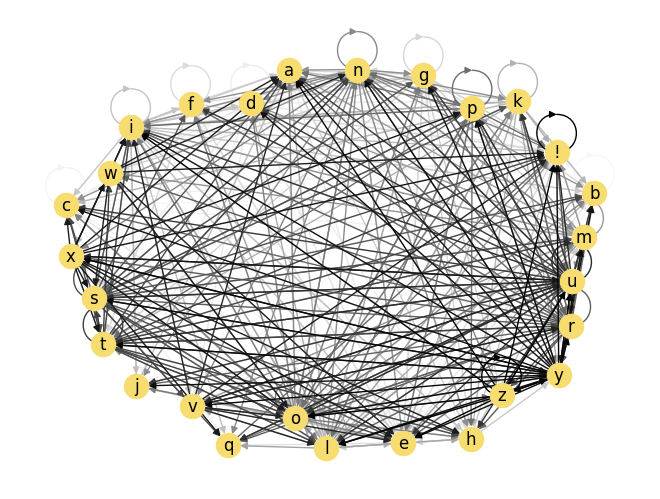

In [ ]:
G = myscripts.graphe_markov(A)

nx.draw(G, pos=nx.spring_layout(G, k=15, seed=20),
                 edge_cmap=plt.cm.Greys, 
                 width=1, node_color="#f7dc6f", 
                 edge_color=range(len(G.edges())),
                 with_labels=True)

In [ ]:
corpus = []
for _ in range(1000):
    mot = myscripts.generer(A, PI)
    logv = myscripts.logvraisemblance_markov(mot, A, PI)
    corpus.append((mot, logv))

categorie = myscripts.categoriser(corpus)

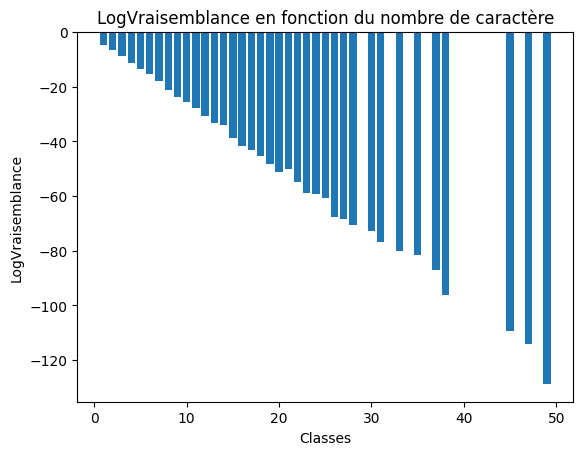

In [ ]:
xLog = []
yLog = []

for i in categorie.keys():
    xLog.append(i)
    yLog.append((sum(categorie[i]["logvraisemblance"]))/len(categorie[i]["logvraisemblance"]))

plt.title("LogVraisemblance en fonction du nombre de caractère")
plt.bar(xLog, yLog)
plt.xlabel("Classes")
plt.ylabel("LogVraisemblance")
plt.show()
plt.close()

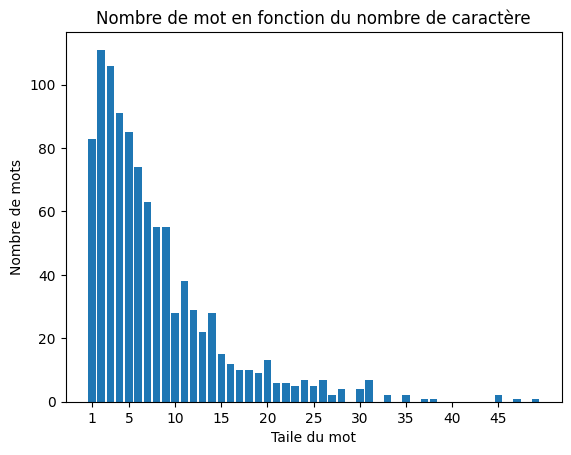

In [ ]:
xTaille = []
yTaille = []

for i in categorie.keys():
    xTaille.append(i)
    yTaille.append(len(categorie[i]["mot"]))

plt.title("Nombre de mot en fonction du nombre de caractère")
plt.bar(xTaille, yTaille)
plt.xlabel("Taile du mot")
plt.ylabel("Nombre de mots")
plt.xticks([1] + [i for i in np.arange(min(xTaille)-1, max(xTaille)+1, 5.0) if i > 0])
plt.show()
plt.close()

K-mers

In [ ]:
K2 = myscripts.dico_k_mers(2)
K5 = myscripts.dico_k_mers(5)

print(f"Alphabet de: {len(K2)} lettres pour K=2\nAlphabet de: {len(K5)} lettres pour K=5")

Alphabet de: 729 lettres pour K=2
Alphabet de: 14348907 lettres pour K=5


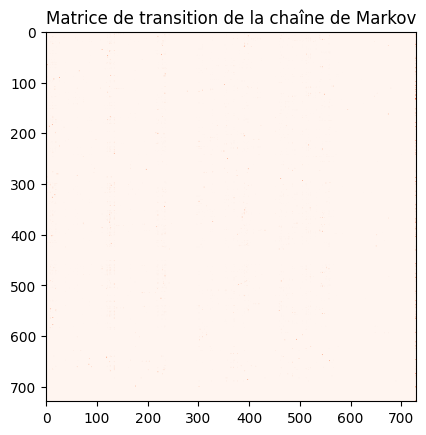

In [ ]:
alphabetK2 = myscripts.dico_k_mers(2)

AK2, PIK2 = myscripts.apprentissage_markov_k_mers([mot.replace("\n", "")+"!" for mot in open("dictionnaire.txt", "r").readlines()], 2)

plt.imshow(AK2, cmap="Reds")
plt.title("Matrice de transition de la chaîne de Markov")
plt.show()
plt.close()

In [ ]:
K2vprenom1 = myscripts.logvraisemblance_markov_k_mers("arthur!", AK2, PIK2, 2)
K2vprenom2 = myscripts.logvraisemblance_markov_k_mers("louise!", AK2, PIK2, 2)
K2vmotfr1 = myscripts.logvraisemblance_markov_k_mers("abusif!", AK2, PIK2, 2)
K2vmotfr2 = myscripts.logvraisemblance_markov_k_mers("bouche!", AK2, PIK2, 2)
K2vmotall = myscripts.logvraisemblance_markov_k_mers("abfuhr!", AK2, PIK2, 2)
K2valea = myscripts.logvraisemblance_markov_k_mers(aleamot, AK2, PIK2, 2)

print(f"LogVraisemblance pour le prénom arthur K=1: {vprenom1}, et pour K=2: {K2vprenom1}")
print(f"LogVraisemblance pour le prénom louise K=1: {vprenom2}, et pour K=2: {K2vprenom2}")
print(f"LogVraisemblance pour le mot abusif K=1: {vmotfr1}, et pour K=2: {K2vmotfr1}")
print(f"LogVraisemblance pour le mot bouche K=1: {vmotfr2}, et pour K=2: {K2vmotfr2}")
print(f"LogVraisemblance pour le mot abfuhr K=1: {vmotall}, et pour K=2: {K2vmotall}")
print(f"LogVraisemblance pour le mot {aleamot} K=1: {valea}, et pour K=2: {K2valea}")

LogVraisemblance pour le prénom arthur K=1: -18.57593611402376, et pour K=2: -34.216025285852346
LogVraisemblance pour le prénom louise K=1: -15.754270139540562, et pour K=2: -14.58397566565571
LogVraisemblance pour le mot abusif K=1: -19.703968400536525, et pour K=2: -14.588053066282859
LogVraisemblance pour le mot bouche K=1: -14.632781387457996, et pour K=2: -9.467334444075865
LogVraisemblance pour le mot abfuhr K=1: -42.899620836841805, et pour K=2: -73.94551058043709
LogVraisemblance pour le mot eooyfw K=1: -66.2274491980265, et pour K=2: -75.66922652183003


In [ ]:
corpusK2 = []
for _ in range(1000):
    mot = myscripts.generer_k_mers(AK2, PIK2, 2)
    mot = mot[:mot.find("!")+1]
    logv = myscripts.logvraisemblance_markov_k_mers(mot, AK2, PIK2, 2)
    corpusK2.append((mot, logv))

categorieK2 = myscripts.categoriser(corpusK2)

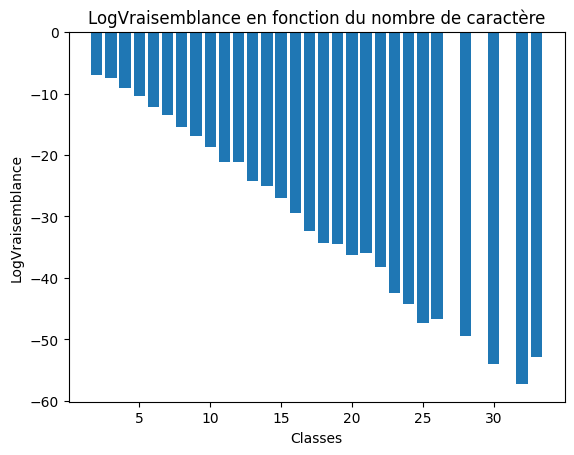

In [ ]:
xK2Log = []
yK2Log = []

for i in categorieK2.keys():
    xK2Log.append(i)
    yK2Log.append((sum(categorieK2[i]["logvraisemblance"]))/len(categorieK2[i]["logvraisemblance"]))

plt.title("LogVraisemblance en fonction du nombre de caractère")
plt.bar(xK2Log, yK2Log)
plt.xlabel("Classes")
plt.ylabel("LogVraisemblance")
plt.show()
plt.close()

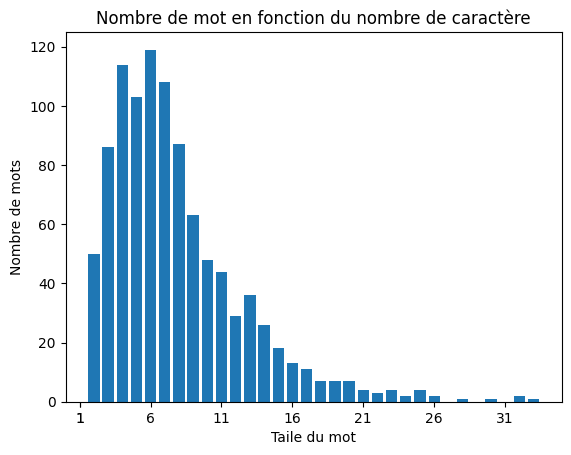

In [ ]:
xK2Taille = []
yK2Taille = []

for i in categorieK2.keys():
    xK2Taille.append(i)
    yK2Taille.append(len(categorieK2[i]["mot"]))

plt.title("Nombre de mot en fonction du nombre de caractère")
plt.bar(xK2Taille, yK2Taille)
plt.xlabel("Taile du mot")
plt.ylabel("Nombre de mots")
plt.xticks([1] + [i for i in np.arange(min(xK2Taille)-1, max(xK2Taille)+1, 5.0) if i > 0])
plt.show()
plt.close()

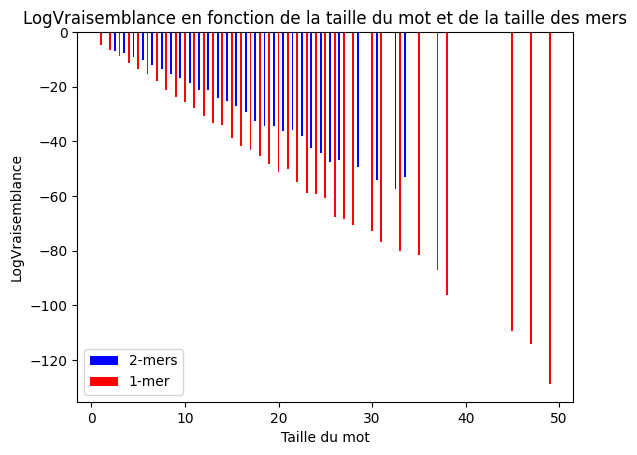

In [ ]:
plt.bar([v+0.5 for v in xK2Log], yK2Log, color="blue", width=0.2, label="2-mers")
plt.bar(xLog, yLog, color="red", width=0.2, label="1-mer")

plt.legend()
plt.title('LogVraisemblance en fonction de la taille du mot et de la taille des mers')
plt.xlabel('Taille du mot')
plt.ylabel('LogVraisemblance')
plt.show()

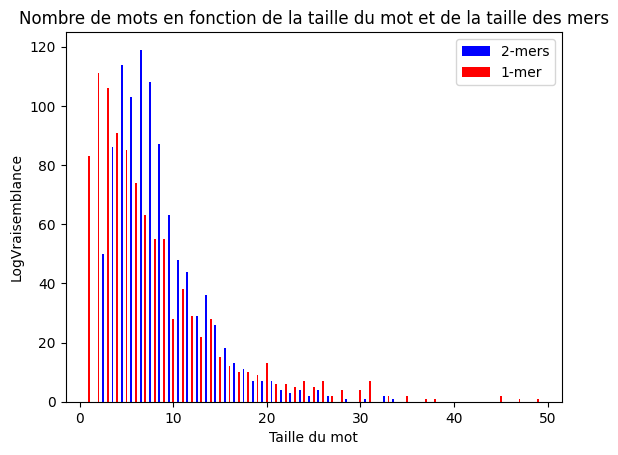

In [ ]:
plt.bar([v+0.5 for v in xK2Taille], yK2Taille, color="blue", width=0.2, label="2-mers")
plt.bar(xTaille, yTaille, color="red", width=0.2, label="1-mer")

plt.legend()
plt.title('Nombre de mots en fonction de la taille du mot et de la taille des mers')
plt.xlabel('Taille du mot')
plt.ylabel('LogVraisemblance')
plt.show()

In [ ]:
limite = 10
binf = 4
bsup = 8

print(f"Les \"\"\"meilleurs\"\"\" {limite} mots de taille {binf} à {bsup - 1} pour K=1 et K=2\n")

for i in range(binf, bsup):

    interet = set()
    interetK2 = set()

    MAX = sorted(categorie[i]["logvraisemblance"])[:limite]
    MAXK2 = sorted(categorieK2[i]["logvraisemblance"])[:limite]

    for indice, mot in enumerate(categorie[i]["mot"]):
        if categorie[i]["logvraisemblance"][indice] in MAX:
            interet.add(mot[:-1])
    
    for indice, mot in enumerate(categorieK2[i]["mot"]):
        if categorieK2[i]["logvraisemblance"][indice] in MAXK2:
            interetK2.add(mot[:-1])

    print(f"K=1: {" | ".join(interet)}")

    print(f"K=2: {" | ".join(interetK2)}\n")

Les """meilleurs""" 10 mots de taille 4 à 7 pour K=1 et K=2

K=1: sake | tied | tino | muye | frpe | tilz | dafr | hack | cinu | prac
K=2: arma | faub | boui | rami | dili | gazi | assa | cory | lund | sint

K=1: iepll | pueni | nirir | tomeu | demiu | rtuts | moita | batea | abrdi | idicr
K=2: annie | effin | nouet | nocts | arbir | noyau | menta | touru | adieu | rachu

K=1: nonopr | tyemal | syaiat | tasiti | minhan | vapurt | tecasi | mevaco | tosppe | ntirke
K=2: cieuri | plosai | pichir | ancred | ouerse | ombeau | maniem | paprun | subiai | alsaou

K=1: nsicule | mapioun | rverata | teuschu | flygttr | dicksus | sambuxe | dspotio | bigoses | iartris
K=2: actraud | clurbit | saccino | spiculu | annodes | bruneak | sousino | clisabe | natempe | inlaper



Significativité du gain de vraisemblance

Pour les mots de taille 4 à 8.

In [ ]:
logVK, logVK2 = [], []

for i in range(4, 9):
    logVK += categorie[i]["logvraisemblance"]
    logVK2 += categorieK2[i]["logvraisemblance"]

logVK, logVK2 = logVK[:min(len(logVK), len(logVK2))], logVK2[:min(len(logVK), len(logVK2))]

alpha = 0.05

print("Différence significative entre K=1 et K=2 pour la vraisemblance des mots générés ?")
print(myscripts.student(logVK, logVK2, alpha))

Différence significative entre K=1 et K=2 pour la vraisemblance des mots générés ?
True


Application aux protéines

In [3]:
AA = ["A", "C", "D", "E", "F",
     "G", "H", "I", "K", "L",
     "M", "N", "P", "Q", "R",
     "S", "T", "V", "W", "Y"]

In [4]:
database = pd.read_csv("protein_database.csv")
database.head()

,pdb_id,chain_code,seq,sst8,sst3,len,has_nonstd_aa
0,1A30,C,EDL,CBC,CEC,3,False
1,1B05,B,KCK,CBC,CEC,3,False
2,1B0H,B,KAK,CBC,CEC,3,False
3,1B1H,B,KFK,CBC,CEC,3,False
4,1B2H,B,KAK,CBC,CEC,3,False


In [5]:
database.describe()

,len
count,477153.000000
mean,268.784595
std,209.692369
min,3.000000
25%,134.000000
50%,229.000000
75%,345.000000
max,5037.000000


In [6]:
db_ = database[(database["len"] >= 100) & (database["len"] < 501) & (database["has_nonstd_aa"] == False)]
db_ = db_.drop_duplicates(subset=['pdb_id', 'sst3'], keep='first')
db_.head()

,pdb_id,chain_code,seq,sst8,sst3,len,has_nonstd_aa
70465,1A5K,A,MELTPREKDKLLLFTAALVAERRLARGLKLNYPESVALISAFIMEG...,CCCCHHHHHHHHHHHHHHHHHHHHHTTCCBCHHHHHHHHHHHHHHH...,CCCCHHHHHHHHHHHHHHHHHHHHHCCCCECHHHHHHHHHHHHHHH...,100,False
70466,1A5L,A,MELTPREKDKLLLFTAALVAERRLARGLKLNYPESVALISAFIMEG...,CCCCHHHHHHHHHHHHHHHHHHHHHTTCCBCHHHHHHHHHHHHHHH...,CCCCHHHHHHHHHHHHHHHHHHHHHCCCCECHHHHHHHHHHHHHHH...,100,False
70467,1A5M,A,MELTPREKDKLLLFTAALVAERRLARGLKLNYPESVALISAFIMEG...,CCCCHHHHHHHHHHHHHHHHHHHHHHTCCBCHHHHHHHHHHHHHHH...,CCCCHHHHHHHHHHHHHHHHHHHHHHCCCECHHHHHHHHHHHHHHH...,100,False
70468,1A5N,A,MELTPREKDKLLLFTAALVAERRLARGLKLNYPESVALISAFIMEG...,CCCCHHHHHHHHHHHHHHHHHHHHHHTCCBCHHHHHHHHHHHHHHH...,CCCCHHHHHHHHHHHHHHHHHHHHHHCCCECHHHHHHHHHHHHHHH...,100,False
70469,1A5O,A,MELTPREKDKLLLFTAALVAERRLARGLKLNYPESVALISAFIMEG...,CCCCHHHHHHHHHHHHHHHHHHHHHTTCCBCHHHHHHHHHHHHHHH...,CCCCHHHHHHHHHHHHHHHHHHHHHCCCCECHHHHHHHHHHHHHHH...,100,False



Pour une fraction d'apprentissage de 0.8 connues.


Pour la classe C (coil), succès de 81.88% soit 171575 erreurs pour un total de 946777.
Pour la classe E (sheet), succès de 84.96% soit 79628 erreurs pour un total de 529409.
Pour la classe H (helix), succès de 81.97% soit 102496 erreurs pour un total de 568384.


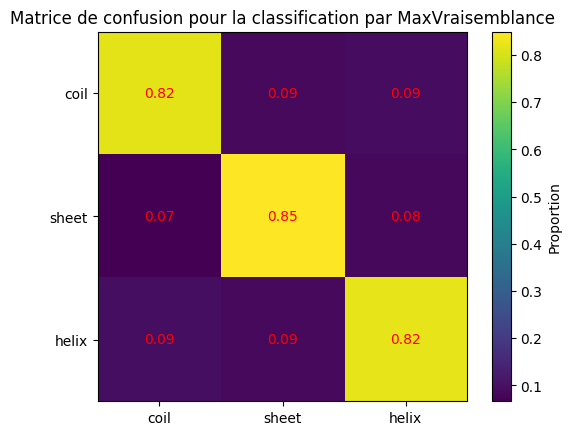

In [ ]:
K = 2

X, Y = [], []

i = 0.8

print(f"=====================================================\n\nPour une fraction d'apprentissage de {round(i, 2)} connues.\n\n")

db_shuffle = db_.sample(frac=1, random_state=12)
indice_train = int(db_shuffle.shape[0] * i)
df_train, df_test = db_shuffle.iloc[:indice_train, :], db_shuffle.iloc[indice_train:, :]

label = myscripts.valeur_par_classe_sst3(df_train["seq"], df_train["sst3"])
modeles = {classe: myscripts.apprentissage_markov_k_mers([seq for seq in label[classe] if len(seq) > K], K, AA) for classe in label}

confusion = myscripts.confusion_structure_secondaire(df_test["seq"], df_test["sst3"], modeles, K, AA)

X.append(i)
Y.append((confusion[0, 0] + confusion[1, 1] + confusion[2, 2])/3)


Prédiction de sous-structure et HMM

In [7]:
sep = 0.8

db_shuffle = db_.sample(frac=1, random_state=12)
indice_train = int(db_shuffle.shape[0] * sep)
df_train, df_test = db_shuffle.iloc[:indice_train, :], db_shuffle.iloc[indice_train:, :]

print(df_train.shape, df_test.shape)

(252805, 7) (63202, 7)


In [55]:
K = 2
observations = [sequ.seq for sequ in df_train.itertuples()]
etats = [sequ.sst3.replace("C", "0").replace("E", "1").replace("H", "1") for sequ in df_train.itertuples()]

SS_A, SS_PI, SS_B = myscripts.hmm_apprentissage_k_mers(etats, observations, K, ["0", "1"], AA)

In [56]:
erreurs, total = 0, 0

for sequ in df_test.itertuples():
    pred = myscripts.viterbi(sequ.seq, SS_A, SS_PI, SS_B, K, ["0", "1"], AA)
    pred = "".join(pred)
    real = sequ.sst3.replace("C", "0").replace("E", "1").replace("H", "1")
    for i in range(len(real)):
        if pred[i] != real[i]:
            erreurs += 1
    total += len(real)

print(f"{round((1-erreurs/total)*100, 3)}% de succès.")

62.049% de succès.


In [57]:
K = 2
observations = [sequ.seq for sequ in df_train.itertuples()]
etats = [sequ.sst3 for sequ in df_train.itertuples()]

SS_A, SS_PI, SS_B = myscripts.hmm_apprentissage_k_mers(etats, observations, K, ["C", "E", "H"], AA)

In [58]:
erreurs3c, erreurs2c = 0, 0
total = 0

for sequ in df_test.itertuples():

    pred = myscripts.viterbi(sequ.seq, SS_A, SS_PI, SS_B, K, ["C", "E", "H"], AA)
    pred1 = "".join(pred)
    real = sequ.sst3

    for i in range(len(real)):
        if pred1[i] != real[i]:
            erreurs3c += 1

    pred2 = "".join(pred).replace("C", "0").replace("E", "1").replace("H", "1")
    real = sequ.sst3.replace("C", "0").replace("E", "1").replace("H", "1")
    
    for i in range(len(real)):
        if pred2[i] != real[i]:
            erreurs2c += 1

    total += len(real)

print(f"{round((1-erreurs3c/total)*100, 3)}% de succès pour une prédiction à 3 classes.")
print(f"{round((1-erreurs2c/total)*100, 3)}% de succès pour une prédiction à 3 classes puis passé en 2 classes.")


48.215% de succès pour une prédiction à 3 classes.
60.682% de succès pour une prédiction à 3 classes puis passé en 2 classes.
